In [15]:
from __future__ import annotations

import matplotlib.pyplot as plt
import numpy as np
from multinterp.rectilinear._multi import MultivaluedInterp

Consider the following multivalued function:

In [16]:
def squared_coords(x, y):
    return x**2 + y**2


def trig_func(x, y):
    return y * np.sin(x) + x * np.cos(y)


def multivalued_func(x, y):
    return np.array([squared_coords(x, y), trig_func(x, y)])

As before, we can generate values on a sample input grid, and create a grid of query points. 

In [17]:
x_grid = np.geomspace(1, 11, 1000) - 1
y_grid = np.geomspace(1, 11, 1000) - 1
x_mat, y_mat = np.meshgrid(x_grid, y_grid, indexing="ij")

z_mat = multivalued_func(x_mat, y_mat)

x_new, y_new = np.meshgrid(
    np.linspace(0, 10, 1000),
    np.linspace(0, 10, 1000),
    indexing="ij",
)

`MultivaluedInterp` can easily interpolate the function at the query points and avoid repeated calculations.

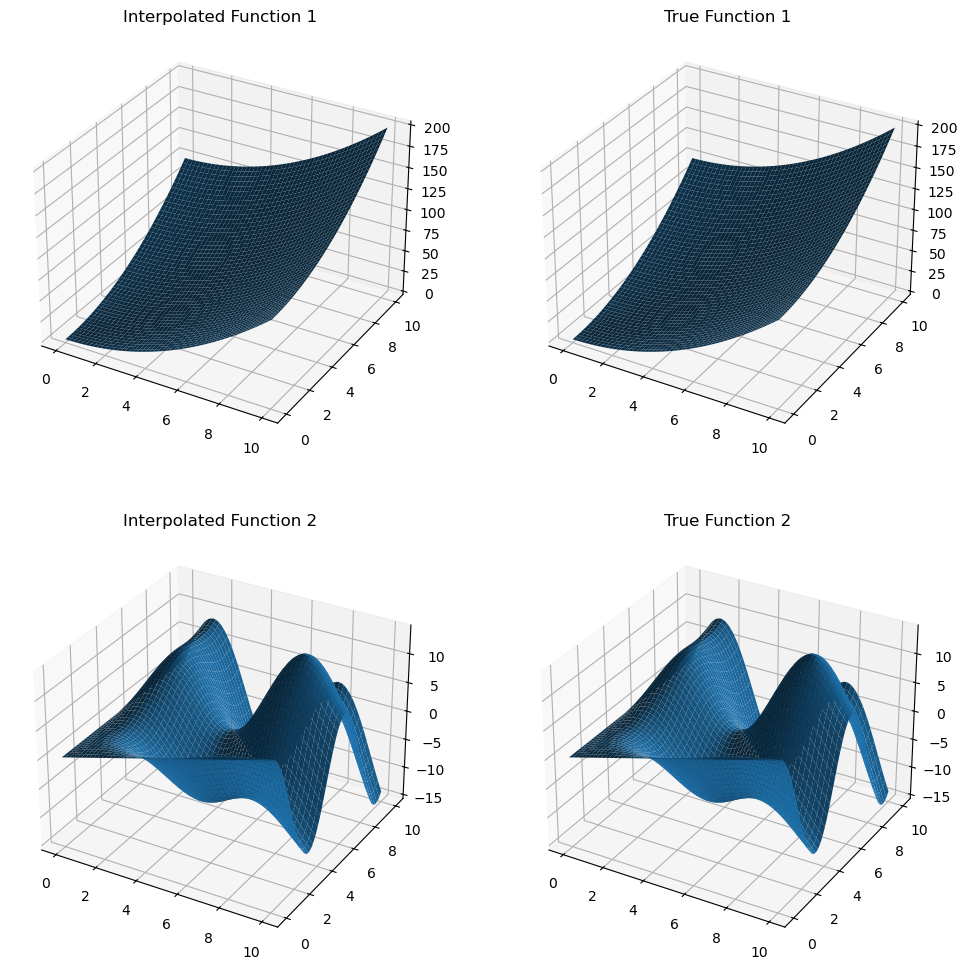

In [19]:
mult_interp = MultivaluedInterp(z_mat, [x_grid, y_grid], backend="cupy")
z_mult_interp = mult_interp(x_new, y_new).get()
z_true = multivalued_func(x_new, y_new)

# Create a figure
fig = plt.figure(figsize=(12, 12))

# Plot the first interpolated function
ax1 = fig.add_subplot(2, 2, 1, projection="3d")
ax1.plot_surface(x_new, y_new, z_mult_interp[0])
ax1.set_title("Interpolated Function 1")

# Plot the first true function
ax2 = fig.add_subplot(2, 2, 2, projection="3d")
ax2.plot_surface(x_new, y_new, z_true[0])
ax2.set_title("True Function 1")

# Plot the second interpolated function
ax3 = fig.add_subplot(2, 2, 3, projection="3d")
ax3.plot_surface(x_new, y_new, z_mult_interp[1])
ax3.set_title("Interpolated Function 2")

# Plot the second true function
ax4 = fig.add_subplot(2, 2, 4, projection="3d")
ax4.plot_surface(x_new, y_new, z_true[1])
ax4.set_title("True Function 2")

# Display the plot
plt.show()